___
# PROJETO 1

## <font color='blue'>William Palmieri</font>
___

## <font color='blue'>A inclusão social e as condições de vida da população aposentada</font>

## Introdução

Uma pesquisa ( http://www.management.utm.my/jurnal-kemanusiaan/attachments/article/128/JK12_128.pdf) feita pela Universiti Utara Malaysia mostrou que existia uma tendência de aposentados ficarem sendo cada vez mais integrados na sociedade. Visto isso, decidi analisar a atual integração dos aposentados na sociedade brasileira.

___
## Análise e Resultados

In [226]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [227]:
estrutura = pd.read_table("pes_py.txt", sep=";")

In [228]:
notas = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

In [229]:
notas.columns = estrutura.iloc[:,0]

In [230]:
notas["Região"] = notas.UF

def Região(uf):
    if uf < 18:
        return "Norte"
    elif uf < 30:
        return "Nordeste"
    elif uf < 36:
        return "Sudeste"
    elif uf < 44:
        return "Sul"
    else:
        return "Centro-oeste"

notas.Região = notas.Região.map(Região)

In [231]:
#Renomeando o Sexo
notas.V0302 = notas.V0302.astype('category')
notas.V0302.cat.categories= ('Masculino', 'Feminino')
#Renomeando a Raça
notas.V0404 = notas.V0404.astype('category')
notas.V0404.cat.categories= ('Branca', 'Preta', 'Amarela', 'Parda', 'Indígena', "ND")
#Renomeando a Alfabetização
notas.V0601 = notas.V0601.astype('category')
notas.V0601.cat.categories= ('Sim', 'Não')
#Renomeando os Estados
notas.UF = notas.UF.astype('category')
notas.UF.cat.categories=('RR', 'AC', 'AM', 'RO', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF')
#Renomeando o Acesso à Internet
notas.V06111 = notas.V06111.astype('category')
notas.V06111.cat.categories= ('Sim', 'Não',)
#Renomeando o Acesso à Internet
notas.V06112 = notas.V06112.astype('category')
notas.V06112.cat.categories= ('Sim', 'Não')
#Renomeando o Trabalho no ano
notas.V0701 = notas.V0701.astype('category')
notas.V0701.cat.categories= ('Sim', 'Não')
#Renomeando Procura de Emprego
notas.V9115 = notas.V9115.astype('category')
notas.V9115.cat.categories= ('Sim', 'Não')
#Renomeando Rendimentos extras
notas.V9124 = notas.V9124.astype('category')
notas.V9124.cat.categories= ('Sim', 'Não')
#Renomeando Anos Estudados
notas.V4803 = notas.V4803.astype('category')
notas.V4803.cat.categories= ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15 ou mais', 'ND')
#Renomeando Rendimentos extras
notas.V4747 = notas.V4747.astype('category')
notas.V4747.cat.categories= ('Agrícola', 'Não-Agrícola')
#Renomeando Aposentados
notas.V9122 = notas.V9122.astype('category')
notas.V9122.cat.categories= ('Sim', 'Não')



In [244]:
tab = pd.DataFrame()


tab["Sexo"] = notas.V0302
tab["Alfabetizado"] = notas.V0601
tab["Estado"] = notas.UF
tab["Regiao"] = notas.Região
tab["Internet"] = notas.V06111
tab["Celular"] = notas.V06112
tab["Renda"] = notas.V4720
tab["Integrantes da família"] = notas.V4724
tab["Trabalho"] = notas.V4747
tab["Idade"] = notas.V8005
tab["Aposentado"] = notas.V9122

In [245]:
tab

,Sexo,Alfabetizado,Estado,Regiao,Internet,Celular,Renda,Integrantes da família,Trabalho,Idade,Aposentado
0,Masculino,Sim,RR,Norte,Não,Sim,1500,3,Não-Agrícola,27,Não
1,Feminino,Sim,RR,Norte,Não,Sim,0,3,NaN,28,Não
2,Masculino,Não,RR,Norte,NaN,NaN,NaN,3,NaN,1,NaN
3,Masculino,Sim,RR,Norte,Sim,Sim,1200,2,Não-Agrícola,51,Não
4,Feminino,Sim,RR,Norte,Sim,Sim,1100,2,Não-Agrícola,43,Não
5,Feminino,Sim,RR,Norte,Não,Não,724,1,NaN,77,Sim
6,Feminino,Sim,RR,Norte,Sim,Sim,0,5,NaN,39,Não
7,Masculino,Sim,RR,Norte,Sim,Sim,7000,5,Não-Agrícola,60,Não
8,Feminino,Sim,RR,Norte,Sim,Sim,1500,5,Não-Agrícola,16,Não
9,Masculino,Sim,RR,Norte,Sim,Sim,0,5,NaN,15,Não


O intúito do trabalho é analisar a população de aposentados no brasil. 

Aqui vemos a quantidade de Aposentados por Região, comparando-a com a quantidade de não-aposentados.

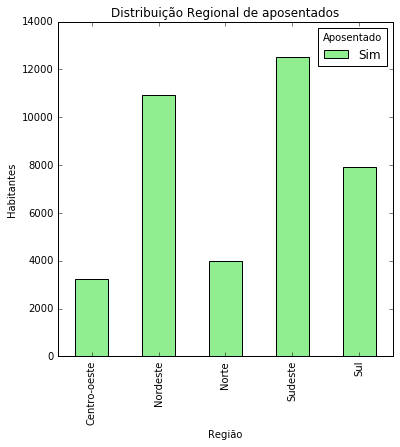

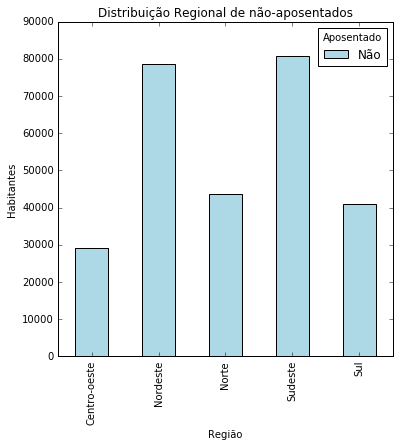

In [234]:
rg_ap = pd.crosstab (notas.Região, tab.Aposentado)
rg_ap_true = rg_ap.iloc[:, 0:1]

rg_ap_true.plot.bar(color=('lightgreen'), stacked=False, figsize = (6,6))
plt.title("Distribuição Regional de aposentados")
plt.xlabel("Região")
plt.ylabel("Habitantes")


rg_nap = pd.crosstab (notas.Região, tab.Aposentado)
rg_nap_true = rg_nap.iloc[:, 1:2]

rg_nap_true.plot.bar(color=('lightblue'), stacked=False, figsize = (6,6))
plt.title("Distribuição Regional de não-aposentados")
plt.xlabel("Região")
plt.ylabel("Habitantes")

<p>IDH do Brasil = 0,816 </p>
<p> </p>
<p> </p>

<p>IDH da Região Sul = 0,850 </p>
<p>IDH da Região Sudeste = 0,847   </p>
<p>IDH da Região Centro-Oeste = 0,838  </p>
<p>IDH da Região Norte = 0,786 </p>
<p>IDH da Região Nordeste = 0,749 </p>

In [235]:
#tab.boxplot(column= "Idade", by=notas.Região)
#plt.show()

<p>Ao analisarmos, percebemos que a população de aposentados está distribuida pelo país de forma semelhanta à população de não-aposentados. Assim, baseando-se também no IDH médio de cada regão, podemos presumir que as condições de vida dos dois grupos é semelhante.</p>
<p> Entretanto, somente esse dado não é suficiente para definir se os aposentados tem uma condição de vida melhor ou pior</p>
<p>Assim, vamos analisar a renda dos aposentados e compará-la com a renda da população</p>

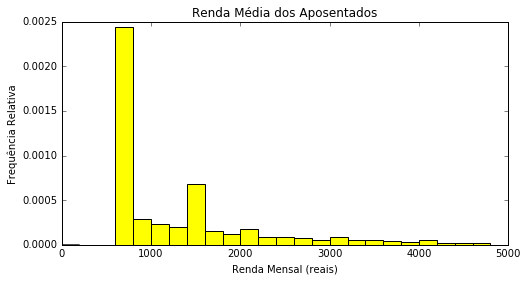

In [236]:
faixa = np.arange(0,120,10)
faixa2 = np.arange(0,5000,200)

#Renda média dos aposentados
renda_ap = tab.Renda[tab.Aposentado == "Sim"]
renda_ap.describe()

#Plotando a RM
renda_ap.plot.hist(bins=faixa2, normed=1, color="yellow", figsize = (8, 4))
plt.title("Renda Média dos Aposentados")
plt.xlabel("Renda Mensal (reais)")
plt.ylabel("Frequência Relativa")

O histograma acima mostra a renda dos aposentados. Pode-se notar que não existe ninguém que ganhe menos que um salário mínimo. Além disso, há um grande pico na faixa de 1 salário mínimo. O restante do histograma decai quase que proporcionalmente, exceto por alguns picos que ficam nas regiões de valores de salário mínimo exatos.    

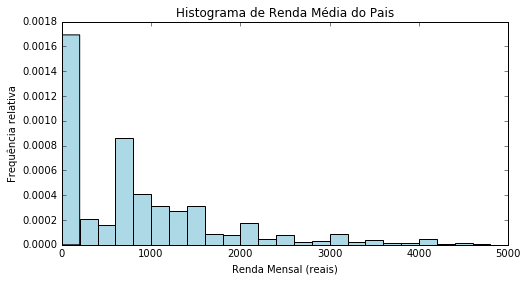

In [237]:
#Plotando a RM
tab.Renda.plot.hist(bins=faixa2, normed=1, color="lightblue", figsize = (8, 4))
plt.title("Histograma de Renda Média do Pais")
plt.xlabel("Renda Mensal (reais)")
plt.ylabel("Frequência relativa")

<p> O histograma de renda média mostra que muitas das pessoas intrevistadas não possuem renda. Além disso, é notável que a renda, no geral, fica abaixo da renda dos aposentados.</p>
<p>Para melhor comparação, farei uma sobreposição dos histogramas</p>

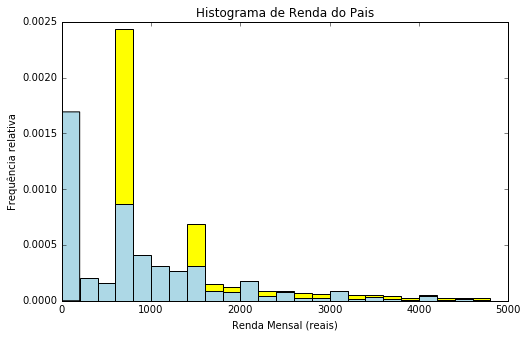

In [246]:
#######################################################################################################################
#######################################################################################################################


#Renda média dos aposentados
renda_ap = tab.Renda[tab.Aposentado == "Sim"]
renda_ap.describe()

#Plotando a RM
renda_ap.plot.hist(bins=faixa2, normed=1, color="yellow", figsize = (8, 8))
plt.title("Renda Média dos Aposentados")
plt.xlabel("Renda Mensal (reais)")
plt.ylabel("Frequência Relativa")

#Plotando a RM
tab.Renda.plot.hist(bins=faixa2, normed=1, color="lightblue", figsize = (8, 5))
plt.title("Histograma de Renda do Pais")
plt.xlabel("Renda Mensal (reais)")
plt.ylabel("Frequência relativa")

<p>O histograma acima é uma sobreposição de dois histogramas anteriores: Renda de Aposentados(Amarelo) x  Renda da Poupulação total (Azul Claro). Assim, podemos comparar com maior precisão a  diferença dos salários. </p>
<p>Temos, então, a certeza de que aposentados têm a mediana da renda maior</p>

<p>Além da renda e do IDH da região, um bom indicador seria a alfabetização que, além de medir a qualidade de vida,  indica também o nível de inserção dos aposentados na sociedade, visto que a habilidade de ler e escrever é tida como parte inerente da existência do homem como um ser social. </p>
<p>A seguir, farei o gráfico de alfabetisação da população aposentada e da não-aposentada.</p>

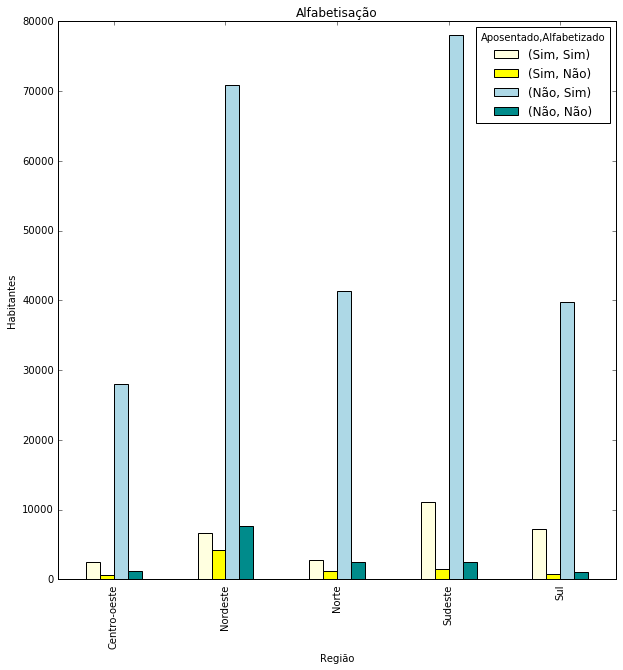

In [247]:
rg_ni_idoso_A = pd.crosstab (notas.Região, [tab.Aposentado,tab.Alfabetizado])
rg_ni_idoso_A_cut = rg_ni_idoso_A.iloc[:, :]

rg_ni_idoso_A_cut.plot.bar(color=("lightyellow", "yellow", "lightblue", "darkcyan"), stacked=False, figsize = (10,10))
plt.title("Alfabetisação")
plt.xlabel("Região")
plt.ylabel("Habitantes")

<p>Como a diferença de população é bastante grande, uma representação em pizza seria melhor para analisar os valores relativos de alfabetização.</p>
<p> Assim, farei um gráfico de Alfabetização da população aposentada e da população não-aposentada<p>

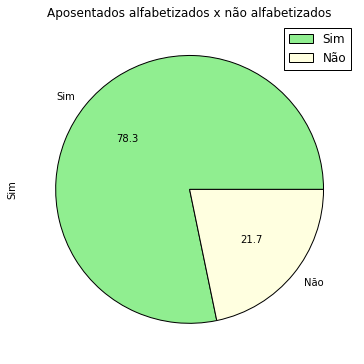

In [240]:
ap_A = pd.crosstab (tab.Alfabetizado, tab.Aposentado)
ap_A_cut = ap_A.iloc[:, 0:1]
ap_A_cut

ap_A_cut.plot(kind='pie', colors=('lightgreen', 'lightyellow'), autopct="%0.1f",legend=True, subplots=True, figsize=(6,6))
plt.title("Aposentados alfabetizados x não alfabetizados")

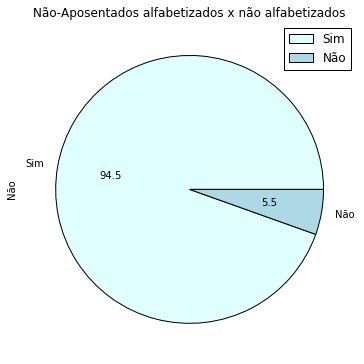

In [241]:
ap_A = pd.crosstab (tab.Alfabetizado, tab.Aposentado)
nap_A_cut = ap_A.iloc[:, 1:2]
nap_A_cut

nap_A_cut.plot(kind='pie', colors=('lightcyan', 'lightblue'), autopct="%0.1f",legend=True, subplots=True, figsize=(6,6))
plt.title("Não-Aposentados alfabetizados x não alfabetizados")

<p> Se compararmos os gráficos, veremos que a população não-aposentada é mais alfabetizada que a população aposentada.</p>
<p>Isso mostra que, no que diz respeito as condições de vida, de um modo geral, os aposentados estão em equilíbrio com o restante da sociedade, pois, ainda que tenham índices de analfabetismo maiores, recebem uma quantia superior e moram em lugares igualmente desenvolvidos. A renda maior é reflexo da existencia de um salário mínimo, que faz com que aposentados tenham um limite mínimo, independente da sua formação, mas trabalhadores clandestinos, não.</p>
<p> Uma diferença na porcentagem de Alfabetização pode ser um indício de que exista uma "Separação Social" entre aposentados e não-aposentados. Para se ter mais certeza da análise, devemos comparar outros dados.</p>
<p> Seguindo a linha de raciocínio, pegarei o dado que diz respeito ao uso de internet, pois esta é cada vez mais utilizada na sociedade e não ter o acesso à ela pode ser visto como um isolamento sócio-cultural</p>

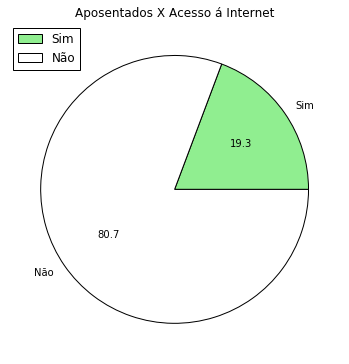

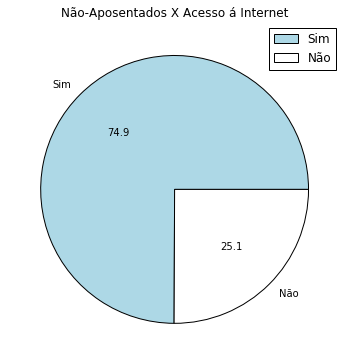

In [242]:
ap_I = pd.crosstab(tab.Internet, tab.Aposentado)
ap_I_cut = ap_I.iloc[0:2, 0:1]

ap_I_cut.plot(kind='pie', colors=('lightgreen', 'white'), autopct="%0.1f",legend=True, subplots=True, figsize=(6,6))
plt.title("Aposentados X Acesso á Internet")
plt.ylabel("  ")


nap_I = pd.crosstab(tab.Internet, tab.Jovem)
nap_I_cut = nap_I.iloc[0:2, 1:2]

nap_I_cut.plot(kind='pie', colors=('lightblue', 'white'), autopct="%0.1f",legend=True, subplots=True, figsize=(6,6))
plt.title("Não-Aposentados X Acesso á Internet")
plt.ylabel("  ")

<p>Como esperado, a quantidade de aposentados que usam a Internet é baixa. Esse número reforça a tese de que há uma exclusão social dos aposentados com o resto da sociedade.</p>
<p>Para poder dar a resposta final com um pouco mais de embasamento, é necessário que mais dados sejam analisados.</p>
<p>Assim, embasarei minha análise também na utilização de celulares pelos aposentados.</p>

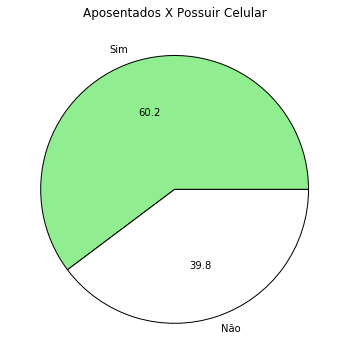

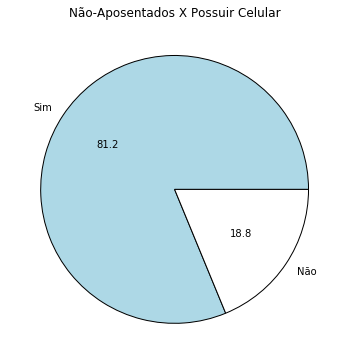

In [243]:
ap_C = pd.crosstab(tab.Celular, tab.Aposentado)
ap_C_cut = ap_C.iloc[0:2, 0:1]
ap_C_cut

ap_C_cut.plot(kind='pie', colors=('lightgreen', 'white'), autopct="%0.1f",legend=False, subplots=True, figsize=(6,6))
plt.title("Aposentados X Possuir Celular")
plt.ylabel("  ")



nap_C = pd.crosstab(tab.Celular, tab.Aposentado)
nap_C_cut = nap_C.iloc[0:2, 1:2]

nap_C_cut.plot(kind='pie', colors=('lightblue', 'white'), autopct="%0.1f",legend=False, subplots=True, figsize=(6,6))
plt.title("Não-Aposentados X Possuir Celular")
plt.ylabel("  ")

<p>Novamente, percebemos uma grande discrepância entre a porcentagem de aposentados que é favorável ao, digamos, uso de tecnologia, e a porcentagem de não-aposentados que o é.</p>

___
## Conclusão 

<p>Dado isso, podemos concluir que, no quesito integração social, os aposentados estão em pior posição se comparados aos não aposentados. A renda mais alta e a localização semelhante do reste da população não é suficiente para que haja uma completa integração dessa parcela pela sociedade como um todo.</p>